In this notebook, we check that samples from the noise model resemble real noise samples.

In [1]:
import sys

import torch
import numpy as np
from tifffile import imread

sys.path.append('../')
from noise_model.PixelCNN import PixelCNN
from utils.tools import autocorrelation, plot

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Load trained noise model

In [3]:
noise_model_location = '../nm_checkpoint/conv/final_params.ckpt'
noise_model = PixelCNN.load_from_checkpoint(noise_model_location).eval().to(device)

Load real noise samples

In [4]:
noise_location = '../data/conv/noise.tif'
noise = imread(noise_location)

Set sample shape and sample from noise model.
Move sample to cpu and convert to numpy array

In [5]:
sample_shape = [1, 1, *noise.shape[-2:]]
sample = noise_model.sample(sample_shape).detach().cpu().numpy()

Visually compare real noise against noise model sample.

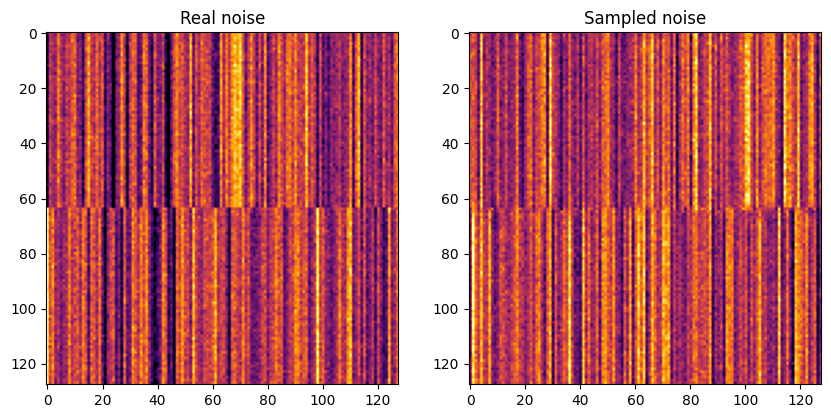

In [6]:
vmin = np.percentile(noise, 1)
vmax = np.percentile(noise, 99)
plot([noise[0], sample[0]], ["Real noise", "Sampled noise"], vmin=vmin, vmax=vmax)

Show autocorrelation of real noise then the noise model sample

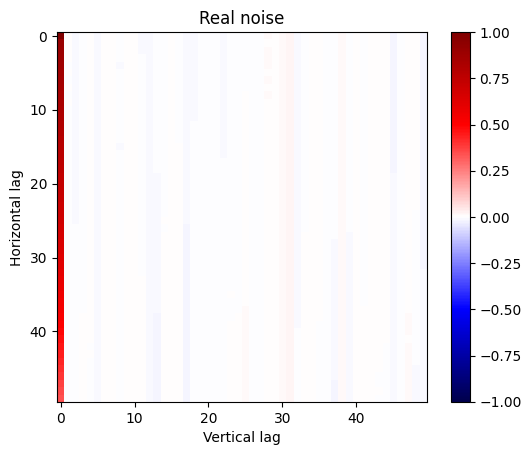

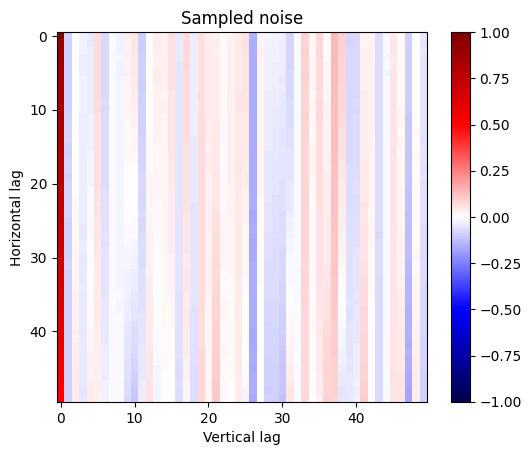

In [7]:
autocorrelation(noise, max_lag=50, title="Real noise")
autocorrelation(sample, max_lag=50, title="Sampled noise")

If either the visual inspection or the autocorrelation plots show significant differences between the real and sampled noise, the training hyperparameters of the noise model need to be tuned. See 1_train_noise_model.ipynb for suggestions.